In [ ]:
import pandas as pd 

df = pd.read_csv('tumor_two_vars.csv')

from sklearn.model_selection import train_test_split 

train, test = train_test_split(df)

X_train = train.drop(columns=['is_cancerous'])
y_train = train['is_cancerous']

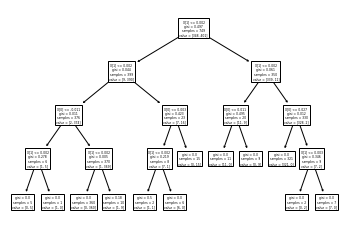

In [ ]:

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train) # choix des meilleurs à poser pour faire classification

criterion = plot_tree(model)

In [ ]:
def predict(X): 
    #traduction de l'arbre avec des conditions

    if X[0] > 0.3: #est ce que la taille est + grande que 0.3 ? 
        return 1 #tumeur cancereuse
    else:
        if X[1] > 0.2:
            return 0
        else: 
            return 1 

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
df = pd.read_csv('tumor_two_vars.csv')

train, test = train_test_split(df)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
models = []
for i in range(10):

    model = DecisionTreeClassifier(max_depth=10)
    data = train.sample(300)
    x_train = data.drop(columns=['is_cancerous'])
    y_train = data['is_cancerous']

    model.fit(x_train,y_train)

    models.append(model)



models



[DecisionTreeClassifier(max_depth=10),
 DecisionTreeClassifier(max_depth=10),
 DecisionTreeClassifier(max_depth=10),
 DecisionTreeClassifier(max_depth=10),
 DecisionTreeClassifier(max_depth=10),
 DecisionTreeClassifier(max_depth=10),
 DecisionTreeClassifier(max_depth=10),
 DecisionTreeClassifier(max_depth=10),
 DecisionTreeClassifier(max_depth=10),
 DecisionTreeClassifier(max_depth=10)]

In [ ]:
def predict(models, X):
    preds = []

    hash_predictions = {}

    for model in models: 
        prediction = model.predict(X)
        if prediction in hash_predictions:
            hash_predictions[prediction] +=1
        else:
            hash_predictions[prediction] = 1
        preds.append(prediction)
    
    hash_predictions = {}
    max_number = 0
    majority_class = None
    for prediction in hash_predictions:
        if hash_predictions[prediction] > max_number:
            max_number = hash_predictions[prediction]
            majority_class = prediction
        
    return majority_class

    ## si régression : on fait la moyenne np.mean(np.array(preds))
